In [1]:
!pip install neuron

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Stylized-Cell-model/

/content/drive/MyDrive/Stylized-Cell-model


In [4]:
from neuron import h
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import os
from stylized_module.stylized_cell import Stylized_Cell
from stylized_module.ecp import EcpMod, newposition
from stylized_module.recorder import Recorder
from stylized_module.point_current import Point_current

In [5]:
sum_soma_r=0
sum_soma_x=0
sum_soma_y=0
sum_soma_z=0
sum_basal_r=0
sum_basal_x=0
sum_basal_y=0
sum_basal_z=0
sum_ap_r=0
sum_ap_x=0
sum_ap_y=0
sum_ap_z=0
soma_count=0
ap_count=0
basal_count=0
basal_xd=[]
basal_yd=[]
basal_zd=[]
ap_xd=[]
ap_yd=[]
ap_zd=[]

basal_r=[]
basal_d=[]
ap_r=[]
ap_d=[]



with open('L5Morphology.swc.txt') as f:
    lines=f.read().splitlines()
    for line in lines:
      x=line.split()

      if x[1] == '1':
        sum_soma_r=sum_soma_r+float(x[5])
        sum_soma_x=sum_soma_x+float(x[2])
        sum_soma_y=sum_soma_y+float(x[3])
        sum_soma_z=sum_soma_z+float(x[4])
        soma_count=soma_count+1

soma_avg_r=sum_soma_r/soma_count
soma_x=sum_soma_x/soma_count
soma_y=sum_soma_y/soma_count
soma_z=sum_soma_z/soma_count

with open('L5Morphology.swc.txt') as f:
    lines=f.read().splitlines()
    for line in lines:
      x=line.split()

      if x[1] == '3':
        sum_basal_r=sum_basal_r+float(x[5])
        sum_basal_x=sum_basal_x+float(x[2])
        sum_basal_y=sum_basal_x+float(x[3])
        sum_basal_z=sum_basal_x+float(x[4])
        basal_r.append(float(x[5]))
        basal_seg_d=(((-soma_x+float(x[2]))**2)+((-soma_y+float(x[3]))**2)+((-soma_z+float(x[4]))**2))**0.5
        basal_seg_xd=(-soma_x+float(x[2]))
        basal_seg_yd=(-soma_y+float(x[3]))
        basal_seg_zd=(-soma_x+float(x[4]))

        basal_d.append(basal_seg_d)
        basal_xd.append(basal_seg_xd)
        basal_yd.append(basal_seg_yd)
        basal_zd.append(basal_seg_zd)
        basal_count=basal_count+1

      elif x[1] == '4':
        sum_ap_r=sum_ap_r+float(x[5])
        sum_ap_x=sum_soma_x+float(x[2])
        sum_ap_y=sum_soma_x+float(x[3])
        sum_ap_z=sum_soma_x+float(x[4])
        ap_r.append(float(x[5]))
        ap_seg_d=(((-soma_x+float(x[2]))**2)+((-soma_y+float(x[3]))**2)+((-soma_z+float(x[4]))**2))**0.5
        ap_seg_xd=(-soma_x+float(x[2]))
        ap_seg_yd=(-soma_y+float(x[3]))
        ap_seg_zd=(-soma_x+float(x[4]))
        ap_d.append(ap_seg_d)
        ap_xd.append(ap_seg_xd)
        ap_yd.append(ap_seg_yd)
        ap_zd.append(ap_seg_zd)
        ap_count=ap_count+1

soma_avg_r=sum_soma_r/soma_count
soma_x=sum_soma_x/soma_count
soma_y=sum_soma_y/soma_count
soma_z=sum_soma_z/soma_count

basal_avg_r=sum_basal_r/basal_count
basal_avg_x=sum_basal_x/basal_count
basal_avg_y=sum_basal_y/basal_count
basal_avg_z=sum_basal_z/basal_count

ap_avg_r=sum_ap_r/ap_count
ap_avg_x=sum_ap_x/ap_count
ap_avg_y=sum_ap_y/ap_count
ap_avg_z=sum_ap_z/ap_count



# print(soma_avg_r)
# print(basal_avg_r)
# print(ap_avg_r)
# print(ap_r)
# print(basal_d)

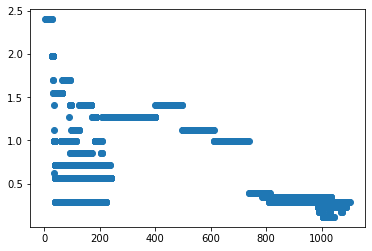

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(ap_d,ap_r)  # blue
# plt.scatter(ap_xd,ap_r) # orange
# plt.scatter(ap_yd,ap_r) # green
# plt.scatter(ap_zd,ap_r) # red

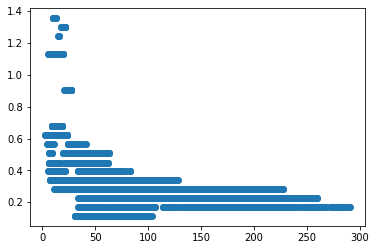

In [7]:
plt.scatter(basal_d,basal_r)  # blue
# plt.scatter(basal_xd,basal_r) # orange
# plt.scatter(basal_yd,basal_r) # green
# plt.scatter(basal_zd,basal_r) # red

In [13]:
basal=[]
somaapical_r=[]
proxapical_r=[]
proxtrunk_r=[]
midtrunk_r=[]
disttrunk_r=[]
tuft_r=[]

for i in range(len(ap_d)):
   if ap_d[i] < 210:
     somaapical_r.append(ap_r[i])

   elif ap_d[i] > 225 and ap_d[i] < 400:
     proxtrunk_r.append(ap_r[i])

   elif ap_d[i] > 200 and ap_d[i] < 400:
     proxapical_r.append(ap_r[i])

   elif ap_d[i] > 400 and ap_d[i] < 600:
     midtrunk_r.append(ap_r[i])

   elif ap_d[i] > 600 and ap_d[i] < 800:
     disttrunk_r.append(ap_r[i])

   elif ap_d[i] > 800:
      tuft_r.append(ap_r[i])

basal_r_avg = np.mean(basal_r)
somaapical_r_avg = np.mean(somaapical_r)
proxtrunk_r_avg = np.mean(proxtrunk_r)
proxapical_r_avg = np.mean(proxapical_r)
midtrunk_r_avg = np.mean(midtrunk_r)
disttrunk_r_avg = np.mean(disttrunk_r)
tuft_r_avg = np.mean(tuft_r)

print('basal_r_avg is',basal_r_avg)
print('somaapical_r_avg is',somaapical_r_avg)
print('proxtrunk_r_avg is',proxtrunk_r_avg)
print('proxapical_r_avg is',proxapical_r_avg)
print('midtrunk_r_avg is',midtrunk_r_avg)
print('disttrunk_r_avg is',disttrunk_r_avg)
print('tuft_r_avg is',tuft_r_avg)

basal_r_avg is 0.2845214238628873
somaapical_r_avg is 0.7905254531430776
proxtrunk_r_avg is 1.1019278606965177
proxapical_r_avg is 0.615524193548387
midtrunk_r_avg is 1.2564285714285712
disttrunk_r_avg is 0.6167763157894737
tuft_r_avg is 0.2720864106351551
